In [71]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.ca import CA
import scipy

 Nous chargeons la feuille« AFC» du classeur « AFC.xlsx ».

In [72]:
Data = pandas.read_excel("AFC.xlsx",sheet_name="AFC",index_col=0)
print(Data);

       Mauvais  Moyen  Bon  Tres bon
16-24       69     49   48        41
25-34      148     45   14        22
35-44      170     65   12        29
44-54      159     57   12        28
55-64      122     26    6        18
65-74      106     21    5        23
75+         40      7    1        14


calculons les totaux en ligne et  les totaux en colonnes.

In [73]:
#calcul des totaux en ligne
tot_lig = numpy.sum(Data.values,axis=1)
print(tot_lig)


#calcul des totaux en colonne
tot_col = numpy.sum(Data.values,axis=0)
print(tot_col)


[207 229 276 256 172 155  62]
[814 270  98 175]


Analyse des profils lignes:


In [74]:
# calculons les proportions lignes
prof_lig = numpy.apply_along_axis(arr=D.values,axis=1,func1d=lambda x:x/numpy.sum(x))
print(prof_lig)

[[0.33333333 0.23671498 0.23188406 0.19806763]
 [0.64628821 0.19650655 0.06113537 0.09606987]
 [0.61594203 0.23550725 0.04347826 0.10507246]
 [0.62109375 0.22265625 0.046875   0.109375  ]
 [0.70930233 0.15116279 0.03488372 0.10465116]
 [0.68387097 0.13548387 0.03225806 0.1483871 ]
 [0.64516129 0.11290323 0.01612903 0.22580645]]


représentation graphique  des profils des groupes d'âge

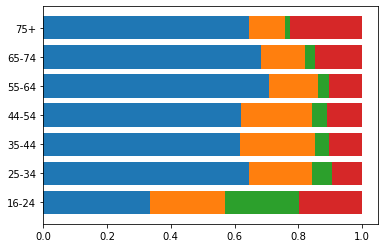

In [75]:
somme = numpy.zeros(shape=(prof_lig.shape[0]))
for i in range(prof_lig.shape[1]):
 plt.barh(range(prof_lig.shape[0]),prof_lig[:,i],left=somme)
 somme = somme + prof_lig[:,i]

plt.yticks(range(prof_lig.shape[0]),D.index)
plt.show()


 
Dans notre exemple , on remarque que les profils des groupes d'âge 25-34, 35-44 et 45-54 sont proches les uns des autre

calulons les profils marginals corresp. 

In [76]:
prof_marg_lig = tot_col/numpy.sum(tot_col)
print(prof_marg_lig)

[0.59985262 0.19896831 0.07221813 0.12896094]


 caculons la distance du KHI-2 (La  distance  entre  profils) entre la tranche 35-44(2) et 44-54(3).

In [77]:
print(numpy.sum((prof_lig[2,:]-prof_lig[3,:])**2/prof_marg_lig))

0.001177576385652352


calculons la distance du KHI-2 entre la tranche(2) et 25-34(1).

In [78]:
print(numpy.sum((prof_lig[2,:]-prof_lig[1,:])**2/prof_marg_lig))

0.014125469695901923


calculons la distance entre paires de modalités lignes.

In [79]:
distPairesLig = numpy.zeros(shape=(prof_lig.shape[0],prof_lig.shape[0]))
#double boucle
for i in range(prof_lig.shape[0]-1):
  for j in range(0,prof_lig.shape[0]):
     distPairesLig[i,j] = numpy.sum((prof_lig[i,:]-prof_lig[j,:])**2/prof_marg_lig)
 #distPairesLig[j,i] = distPairesLig[i,j]
#affichage
print(pandas.DataFrame(distPairesLig,index=D.index,columns=D.index))

          16-24     25-34     35-44     44-54     55-64     65-74       75+
16-24  0.000000  0.655781  0.691734  0.673993  0.877488  0.827296  0.889690
25-34  0.655781  0.000000  0.014125  0.008684  0.027067  0.053841  0.193696
35-44  0.691734  0.014125  0.000000  0.001178  0.051309  0.074267  0.200361
44-54  0.673993  0.008684  0.001178  0.000000  0.040824  0.059522  0.179716
55-64  0.877488  0.027067  0.051309  0.040824  0.000000  0.017242  0.132908
65-74  0.827296  0.053841  0.074267  0.059522  0.017242  0.000000  0.055140
75+    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000


affichage sous forme de heatmap.
Une représentation graphique sous forme de « heatmap » donne une vision globale des écarts.

<AxesSubplot:>

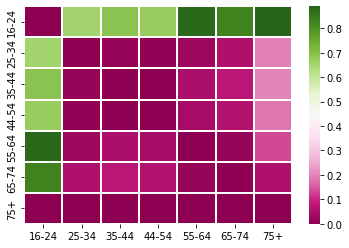

In [80]:
sns.heatmap(distPairesLig,vmin=0,vmax=numpy.max(distPairesLig),linewidth=0.1,cmap='PiYG',xticklabels=D.index,
yticklabels=D.index)


Les opinions de la tranche d'âge 25-34, 35-44 et 45-54  présentent des structures de choix assez proches . Il en est de même aussi, à un  moindre degré cependant , entre le  groupes  d'âge 16-24 

Distance à l’origine

In [81]:
distoLig = numpy.apply_along_axis(arr=prof_lig,axis=1,func1d=lambda x:numpy.sum((x-prof_marg_lig)**2/prof_marg_lig))
#affichage
print(pandas.DataFrame(distoLig,index=D.index))

              0
16-24  0.515613
25-34  0.013715
35-44  0.023004
44-54  0.015440
55-64  0.055340
65-74  0.057061
75+    0.156940


Calculons le poids et l'inertie des lignes.

In [82]:
poidsLig = tot_lig/numpy.sum(tot_lig)

#inertie des lignes
inertieLig = distoLig * poidsLig
#affichage
print(pandas.DataFrame(numpy.transpose([distoLig,poidsLig,inertieLig]),columns=['Disto2','Poids','Inertie'] ,index=D.index))


         Disto2     Poids   Inertie
16-24  0.515613  0.152542  0.078653
25-34  0.013715  0.168755  0.002314
35-44  0.023004  0.203390  0.004679
44-54  0.015440  0.188651  0.002913
55-64  0.055340  0.126750  0.007014
65-74  0.057061  0.114223  0.006518
75+    0.156940  0.045689  0.007170


 Les poids sont des proportions marginales utilisées pour pondérer les profils des points lors du calcul des distances. Plus la distance à l'origine est grande, plus le profil de la catégorie est différent du profil moyen (plus la catégorie participe à la dépendance entre les deux variables). Les groupes d'âge 25-34, 35-44 et 45-54 ont la distance la plus courte à l'origine, ce qui indique que les profils de ces groupes sont proches du profil moyen.


In [83]:
#total inertie
tot_InertieLig = numpy.sum(inertieLig)
print(tot_InertieLig)

0.10926129027524115


Nous réalisons une AFC avec le package « fanalysis ».

Affichons les valeurs propres.

Affichons la fraction d’inertie restituée par facteur.

Affichons la fraction d’inertie restituée cumulée.

In [84]:
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)
#information restituée sur les facteurs
print(afc.eig_)





[[9.46644758e-02 1.16630074e-02 2.93380708e-03]
 [8.66404521e+01 1.06744185e+01 2.68512945e+00]
 [8.66404521e+01 9.73148705e+01 1.00000000e+02]]


In [85]:
#coordonnees des modalites lignes
print(pandas.DataFrame(afc.row_coord_,index=D.index))

              0         1         2
16-24 -0.717578 -0.025250 -0.007524
25-34  0.086735  0.055674 -0.055606
35-44  0.102691  0.097388  0.054534
44-54  0.096790  0.069078  0.036061
55-64  0.215953 -0.042370 -0.083119
65-74  0.182981 -0.152328 -0.019371
75+    0.162087 -0.341728  0.117856



Nous observons pour chaque ligne de la matrice « eig_ »: les valeurs propres des "min(7-1, 4-1)= 3" facteurs, la fraction

d’inertie restituée par facteur et cumulée. La variance du 1er facteur est égale à (𝜆1 = 0.09466), elle représente déjà

( 0.09466/0.10926129027524115 = 86,68%) de l’inertie totale.


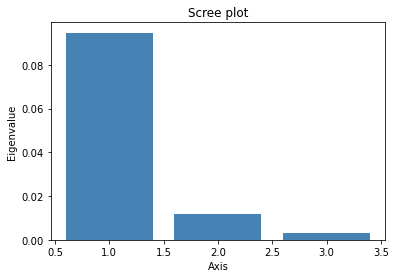

0.011663007366455366


In [86]:
#affichage graphique des v.p.
afc.plot_eigenvalues()
print(numpy.sum(poidsLig* afc.row_coord_[:,1]**2))

Nous représentons les individus lignes dans le premier plan factoriel qui restitue 97.3% de l’information disponible.

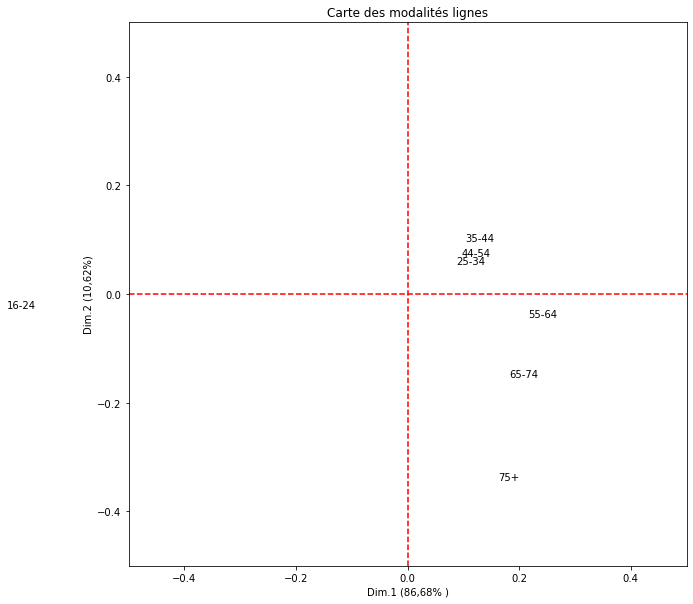

In [87]:
#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.5,+0.5,-0.5,+0.5])
ax.plot([-0.5,+0.5],[0,0],color='red',linestyle='--')
ax.plot([0,0],[-0.5,+0.5],color='red',linestyle='--')
ax.set_xlabel("Dim.1 (86,68% )")
ax.set_ylabel("Dim.2 (10,62%)")
plt.title("Carte des modalités lignes")
for i in range(D.shape[0]):
 ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i])

plt.show()

En mettant la même échelle en abscisse et ordonnées, nous constatons que la différenciation des modalités lignes se joue 

quasi-exclusivement sur le premier axe factoriel

Calculons les distances euclidienne dans le 1er plan.

In [88]:
distPairesLigF1 = numpy.zeros(shape=(prof_lig.shape[0],prof_lig.shape[0]))
#double boucle
for i in range(prof_lig.shape[0]-1):
   for j in range(0,prof_lig.shape[0]):
      distPairesLigF1[i,j] = numpy.sum((afc.row_coord_[i,0]-afc.row_coord_[j,0])**2)

#affichage
print(pandas.DataFrame(distPairesLigF1,index=D.index,columns=D.index))

          16-24     25-34     35-44     44-54     55-64     65-74       75+
16-24  0.000000  0.646921  0.672843  0.663196  0.871480  0.811007  0.773811
25-34  0.646921  0.000000  0.000255  0.000101  0.016697  0.009263  0.005678
35-44  0.672843  0.000255  0.000000  0.000035  0.012828  0.006446  0.003528
44-54  0.663196  0.000101  0.000035  0.000000  0.014200  0.007429  0.004264
55-64  0.871480  0.016697  0.012828  0.014200  0.000000  0.001087  0.002902
65-74  0.811007  0.009263  0.006446  0.007429  0.001087  0.000000  0.000437
75+    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000


# Analyse des colonnes.

 De la même manière que pour les profils lignes, nous pouvons calculer les distances à l’origine , les poids (des colonnes) et les inerties.

Nous calculons tout d’abord le profil « moyen » des filières.

In [89]:
#profil marginal des filières
prof_marg_col = tot_lig/numpy.sum(tot_lig)
print(prof_marg_col)

[0.15254237 0.16875461 0.20338983 0.18865144 0.12675018 0.11422255
 0.04568902]


In [90]:
#tableau des profils colonnes
prof_col = numpy.apply_along_axis(arr=D.values,axis=0,func1d=lambda x:x/numpy.sum(x))
print(pandas.DataFrame(prof_col,index=D.index,columns=D.columns))

        Mauvais     Moyen       Bon  Tres bon
16-24  0.084767  0.181481  0.489796  0.234286
25-34  0.181818  0.166667  0.142857  0.125714
35-44  0.208845  0.240741  0.122449  0.165714
44-54  0.195332  0.211111  0.122449  0.160000
55-64  0.149877  0.096296  0.061224  0.102857
65-74  0.130221  0.077778  0.051020  0.131429
75+    0.049140  0.025926  0.010204  0.080000


Pour chaque colones, nous formons la distance à l’origine

In [91]:
#distance**2 à l'orgine
distoCol = numpy.apply_along_axis(arr=prof_col,axis=0,func1d=lambda x:numpy.sum((x
-prof_marg_col)**2/prof_marg_col))

#affichage
print(pandas.DataFrame(distoCol,index=D.columns))

                 0
Mauvais   0.038229
Moyen     0.042543
Bon       0.901452
Tres bon  0.098974


La composition des opinions est manifestement différente de la globalité. En comparant son profil avec le profil marginal, nous notons une surreprésentation des opinion des groupes d'âge 25-34, 35-44 et 45-54  , et une sous-représentation des les vieillards.


calculons le poids 

In [92]:
#poids de chaque colonne
poidsCol = tot_col/numpy.sum(tot_col)
print(pandas.DataFrame(poidsCol,index=D.columns))

                 0
Mauvais   0.599853
Moyen     0.198968
Bon       0.072218
Tres bon  0.128961


calculons les inerties.

In [93]:
#inertie
inertieCol = distoCol*poidsCol
print(pandas.DataFrame(inertieCol,index=D.columns))

                 0
Mauvais   0.022932
Moyen     0.008465
Bon       0.065101
Tres bon  0.012764


Les 
jugement "Bon" et "Mauvais" sont celles qui pèseront le plus dans l’analyse, mais pas pour les mêmes raisons : la première"BON"
parce que sa distance à l'origine est élevée 0.901452 , la seconde parce qu’elle rassemble un grand nombre des opinions (poids  = 0.599853 ).

In [94]:
#somme des inerties
print(numpy.sum(inertieCol))

0.10926129027524116


 La somme des inerties des modalités colonnes identique à la somme des inerties des modalités lignes . Ce n’est pas un       hasard.

En AFC, les lignes et les colonnes jouent des roles symetriques(dualité). 

nous affichons les coordonnées des modalités colonnes pour les 3 facteurs de l’AFC sur les données .

In [95]:

print(pandas.DataFrame(afc.col_coord_,index=D.columns))

                 0         1         2
Mauvais   0.193240 -0.010786 -0.027758
Moyen    -0.102011  0.166096  0.067447
Bon      -0.943976  0.019601 -0.099887
Tres bon -0.212830 -0.217067  0.080991


passons à la représentation graphique dans le plan.

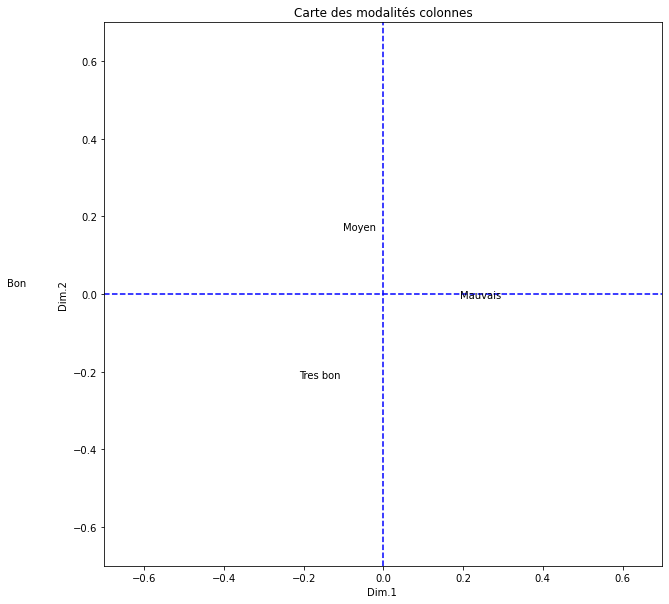

In [96]:

#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='blue',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='blue',linestyle='--')
ax.set_xlabel("Dim.1 ")
ax.set_ylabel("Dim.2 ")
plt.title("Carte des modalités colonnes")

for i in range(D.shape[1]):
   ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i])
plt.show()

# Analyse de l’association lignes-colonnes

nous formons le tableau des effectifs théoriques :

In [97]:
#effectifs totaux
n = numpy.sum(D.values)
#tableau sous indépendance
E = numpy.dot(numpy.reshape(tot_lig,(7,1)),numpy.reshape(tot_col,(1,4)))/n
print(E)

[[124.16949153  41.18644068  14.94915254  26.69491525]
 [137.36624908  45.56374355  16.53795136  29.53205601]
 [165.55932203  54.91525424  19.93220339  35.59322034]
 [153.56226971  50.93588799  18.48784083  33.01400147]
 [103.17464996  34.22254974  12.42151805  22.18128224]
 [ 92.97715549  30.84008843  11.19380987  19.9889462 ]
 [ 37.1908622   12.33603537   4.47752395   7.99557848]]


Nous pouvons calculer la statistique de test et la probabilité critique :

In [98]:
#statistique du KHI-2
KHI2 = numpy.sum(((D.values-E)**2)/E)
print(KHI2)


148.26757090350225


In [99]:
#degré de liberté
ddl = (E.shape[0]-1)*(E.shape[1]-1)
print(ddl)


18


La valeur p du test.

In [100]:
print(1-scipy.stats.chi2.cdf(KHI2,ddl))


0.0


Si la valeur p est inférieure à 0,05. Cela indique des preuves solides contre l'hypothèse nulle, car il y a moins de 5% de probabilité que la valeur nulle soit correcte (et les résultats sont aléatoires). Par conséquent, nous rejetons l'hypothèse nulle.

Sinon nous conservons l'hypothèse nulle.

Donc, Le test conduit au rejet de l’hypothèse nulle (p-value ≈ 0). Manifestement


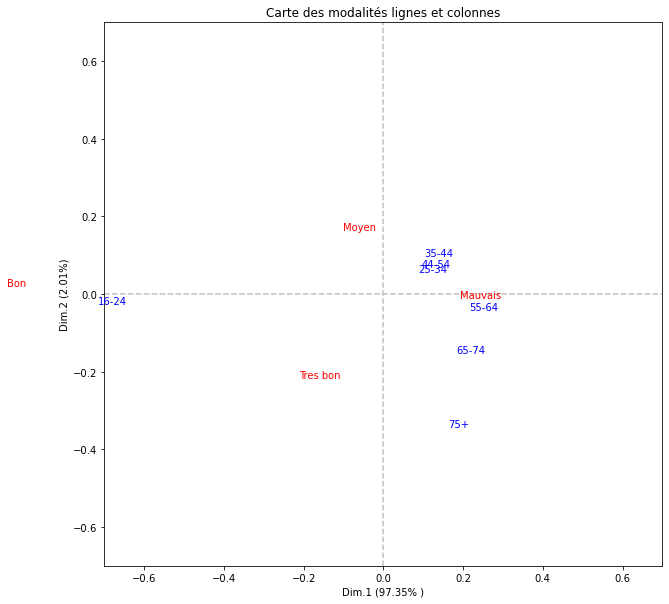

In [101]:
#représentation simultanée
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités lignes et colonnes")
#modalités ligne
for i in range(D.shape[0]):
 ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i],color='blue')
#modalités colonne
for i in range(D.shape[1]):
 ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i],color='red')

plt.show()